In [1]:
!pip install pingouin
import numpy as np
from statsmodels.stats.proportion import proportion_confint, confint_proportions_2indep
import pingouin as pg
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme()
from google.colab import drive
drive.mount('/content/drive')

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.3 MB 932.9 kB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 987.4 kB/s eta 0:00:01
   --------------------------------- ------ 1.0/1.3 MB 1.1 MB/s eta 0:00:01
   --------------------------------- ------ 1.0/1.3 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 1.1 MB/s eta 0:00:00


ModuleNotFoundError: No module named 'google'

(0.4, 0.6)

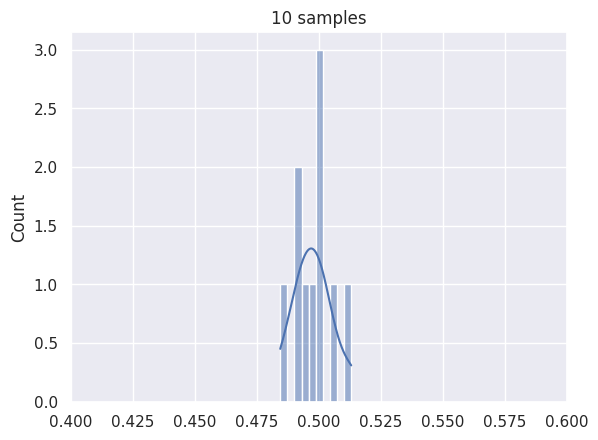

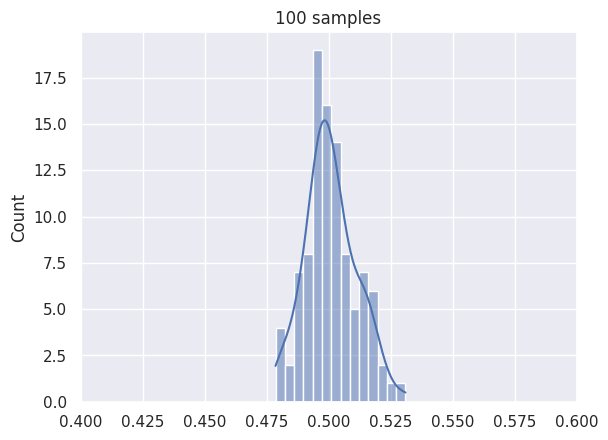

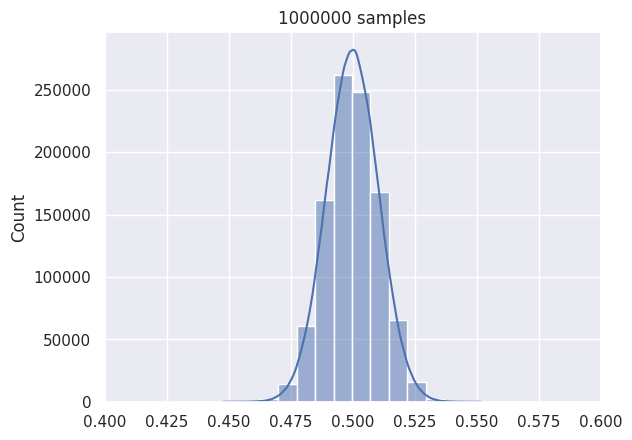

In [ ]:
plt.figure()
sns.histplot(np.random.binomial(2271, 0.5, 10)/2271, bins=10, kde=True)
plt.title("10 samples")
plt.xlim(0.4, 0.6)

plt.figure()
sns.histplot(np.random.binomial(2271, 0.5, 100)/2271, bins=14, kde=True)
plt.title("100 samples")
plt.xlim(0.4, 0.6)

plt.figure()
sns.histplot(np.random.binomial(2271, 0.5, 1000000)/2271, bins=14, kde=True)
plt.title("1000000 samples")
plt.xlim(0.4, 0.6)

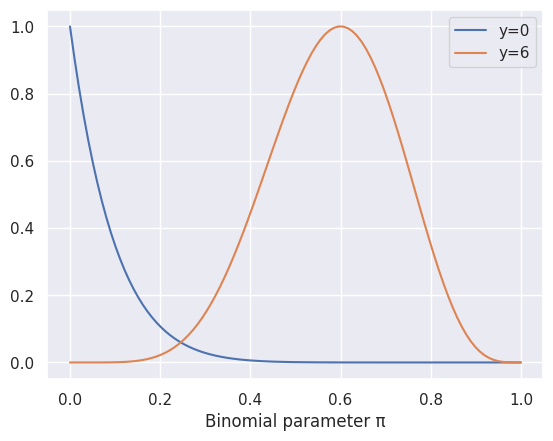

In [ ]:
n = 10
y1 = 0.0
y2 = 6.0
pi = np.linspace(0, 1, 100)

def likelihood_function(y):
   return pi**(y) * (1 - pi)**(n - y)

plt.plot(pi, likelihood_function(y1)/np.max(likelihood_function(y1)), label='y=0')
plt.plot(pi, likelihood_function(y2)/np.max(likelihood_function(y2)), label='y=6')
plt.xlabel('Binomial parameter π')
plt.legend()
plt.grid(True)


In [ ]:
interval = proportion_confint(count=778, nobs=1497, alpha=0.05)
lower, upper = interval[0], interval[1]
print('The 95%% confidence interval is [%.4f - %.4f]'%(lower, upper))

The 95% confidence interval is [0.4944 - 0.5450]


In [ ]:
Anorexia = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/2. Statistical Inference - Estimation/Anorexia.dat", sep='\s+|\s+')
Anorexia.head(10)

<ipython-input-5-3eea8bf833fb>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Anorexia = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/2. Statistical Inference - Estimation/Anorexia.dat", sep='\s+|\s+')


,subject,therapy,before,after
0,1,cb,80.5,82.2
1,2,cb,84.9,85.6
2,3,cb,81.5,81.4
3,4,cb,82.6,81.9
4,5,cb,79.9,76.4
5,6,cb,88.7,103.6
6,7,cb,94.9,98.4
7,8,cb,76.3,93.4
8,9,cb,81.0,73.4
9,10,cb,80.5,82.1


In [ ]:
congitive_behavioral_therapy = Anorexia[Anorexia['therapy']=='cb']
change = congitive_behavioral_therapy['after']-congitive_behavioral_therapy['before']
print(change.describe())

count    29.000000
mean      3.006897
std       7.308504
min      -9.100000
25%      -0.700000
50%       1.400000
75%       3.900000
max      20.900000
dtype: float64


In [ ]:
CI_95 = st.t.interval(confidence=0.95, df=len(change)-1, loc=np.mean(change), scale=st.sem(change))
CI_99 = st.t.interval(confidence=0.99, df=len(change)-1, loc=np.mean(change), scale=st.sem(change))

print('The 95%% confidence interval is [%.4f , %.4f]'\
      %(CI_95[0], CI_95[1]))
print('The 99%% confidence interval is [%.4f , %.4f]'\
      %(CI_99[0], CI_99[1]))

The 95% confidence interval is [0.2269 , 5.7869]
The 99% confidence interval is [-0.7433 , 6.7571]


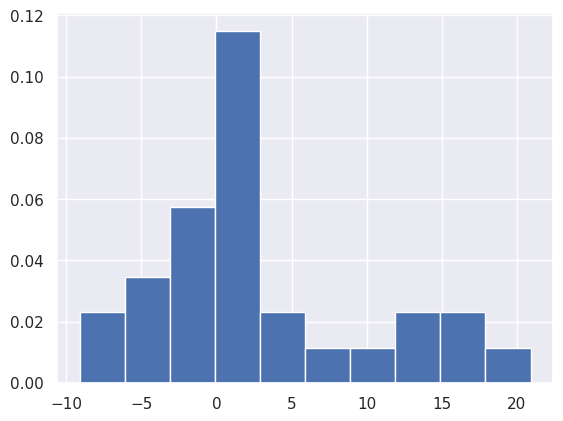

In [ ]:
hist = change.hist(density=True)


In [ ]:
control = Anorexia[Anorexia['therapy']=='c']
change_control = control['after']-control['before']
print(change_control.describe())

count    26.000000
mean     -0.450000
std       7.988705
min     -12.200000
25%      -7.000000
50%      -0.350000
75%       3.600000
max      15.900000
dtype: float64


In [ ]:
res = pg.ttest(change, change_control, paired=False, correction=False)
print('The 95%% confidence interval is [%.4f , %.4f]'\
      %(res['CI95%'][0][0], res['CI95%'][0][1]))

The 95% confidence interval is [-0.6800 , 7.5900]


In [ ]:
group_1_size = 604
group_1_complications = 315
group_2_size = 597
group_2_complications = 304
interval = confint_proportions_2indep(group_1_complications,\
                                      group_1_size,\
                                      group_2_complications,\
                                      group_2_size,\
                                      method='wald')
print('The 95%% confidence interval is [%.4f , %.4f]'\
      %(interval[0], interval[1]))

The 95% confidence interval is [-0.0442 , 0.0688]


In [ ]:
Books = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/2. Statistical Inference - Estimation/Library.dat", sep='\s+|\s+')
Books.head(5)

<ipython-input-15-95b44b95796b>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Books = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/2. Statistical Inference - Estimation/Library.dat", sep='\s+|\s+')


,C,P
0,1,3
1,9,9
2,4,4
3,1,18
4,1,5


In [ ]:
P = Books['P']
P.describe()

count     53.000000
mean      21.981132
std       25.793179
min        3.000000
25%        9.000000
50%       17.000000
75%       19.000000
max      140.000000
Name: P, dtype: float64

Text(0.5, 0, 'Years since publication')

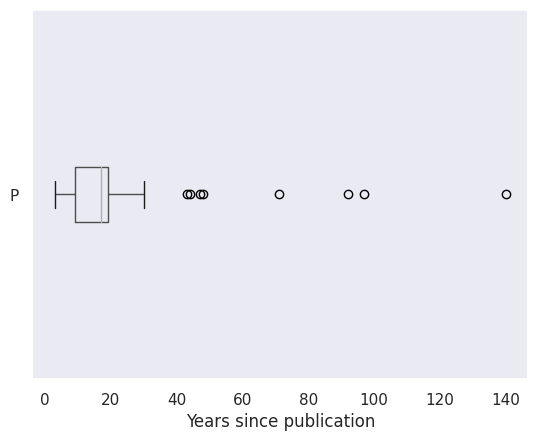

In [ ]:
boxplot = Books.boxplot(column='P', vert=False, grid=False, )
boxplot.set_xlabel('Years since publication')

In [ ]:
bootstrap_ci = st.bootstrap((Books['P'],), np.median,\
                            confidence_level=0.95,
                            method='percentile',\
                            n_resamples=10000)

CI = bootstrap_ci.confidence_interval
SE = bootstrap_ci.standard_error
print('The 95%% confidence interval is [%.4f , %.4f]'\
      %(CI[0], CI[1]))
print('The bootstrap standard error is %.4f'%SE)

The 95% confidence interval is [11.0000 , 19.0000]
The bootstrap standard error is 2.2743


In [ ]:
import random
bootstrap_medians = []
for i in range(10000):
  bootstrap_list = random.choices(range(0,len(Books['P'])-1), k=53)
  bootstrap_sample = Books['P'].iloc[bootstrap_list]
  bootstrap_medians.append(bootstrap_sample.median())

bootstrap_medians_std = np.std(bootstrap_medians)

[CI_low, CI_up] = np.percentile(bootstrap_medians, [2.5, 97.5])

print('The 95%% confidence interval is [%.4f , %.4f]'\
      %(CI_low, CI_up))
print('The bootstrap standard error is %.4f'%bootstrap_medians_std)

The 95% confidence interval is [11.0000 , 19.0000]
The bootstrap standard error is 2.1307
